In [2]:
import pandas as pd
import random
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import apply_affine_transform as Affine, apply_channel_shift as CShift
from utils import *

info = pd.read_csv('./image_info.csv')

In [4]:
c1

file_name  \
0     TCGA_HT_A616_19991226_23   
1      TCGA_DU_7306_19930512_4   
2     TCGA_DU_7306_19930512_17   
3     TCGA_DU_A5TP_19970614_38   
4      TCGA_DU_A5TP_19970614_2   
...                        ...   
1256  TCGA_DU_7014_19860618_26   
1257  TCGA_DU_7014_19860618_24   
1258   TCGA_DU_7014_19860618_2   
1259  TCGA_DU_7014_19860618_54   
1260  TCGA_HT_7881_19981015_17   

                                               img_path  \
0     ./archive/kaggle_3m/TCGA_HT_7680_19970202/TCGA...   
1     ./archive/kaggle_3m/TCGA_HT_7884_19980913/TCGA...   
2     ./archive/kaggle_3m/TCGA_CS_4944_20010208/TCGA...   
3     ./archive/kaggle_3m/TCGA_CS_5393_19990606/TCGA...   
4     ./archive/kaggle_3m/TCGA_HT_7680_19970202/TCGA...   
...                                                 ...   
1256  ./archive/kaggle_3m/TCGA_DU_A5TT_19980318/TCGA...   
1257  ./archive/kaggle_3m/TCGA_HT_A61A_20000127/TCGA...   
1258  ./archive/kaggle_3m/TCGA_FG_A60K_20040224/TCGA...   
1259  ./archive/kaggle_3m/TCGA_HT_A61A_20000127/TCGA...   
1260  ./archive/kaggle_3m/TCGA_HT_A61A_20000127/TCGA...   

                                              mask_path  whites  mask  
0     ./archive/kaggle_3m/TCGA_HT_7680_19970202/TCGA...    2217     1  
1     ./archive/kaggle_3m/TCGA_HT_7884_19980913/TCGA...    1512     1  
2     ./archive/kaggle_3m/TCGA_CS_4944_20010208/TCGA...    1479     1  
3     ./archive/kaggle_3m/TCGA_CS_5393_19990606/TCGA...    4323     1  
4     ./archive/kaggle_3m/TCGA_HT_7680_19970202/TCGA...    2355     1  
...                                                 ...     ...   ...  
1256  ./archive/kaggle_3m/TCGA_DU_A5TT_19980318/TCGA...    1701     1  
1257  ./archive/kaggle_3m/TCGA_HT_A61A_20000127/TCGA...    3525     1  
1258  ./archive/kaggle_3m/TCGA_FG_A60K_20040224/TCGA...     969     1  
1259  ./archive/kaggle_3m/TCGA_HT_A61A_20000127/TCGA...    2847     1  
1260  ./archive/kaggle_3m/TCGA_HT_A61A_20000127/TCGA...    1398     1  

[1261 rows x 5 columns]

In [6]:
aug = info.query('mask == 1 & whites > 500').reset_index(drop=True)

In [7]:
im1 = load_image(aug.loc[0].values[1])
ms1 = load_image(aug.loc[0].values[2], True)

im2 = load_image(aug.loc[1].values[1])
ms2 = load_image(aug.loc[1].values[2], True)

im3 = load_image(aug.loc[2].values[1])
ms3 = load_image(aug.loc[2].values[2], True)

In [8]:
def highboost(img, k=2):
    blur = cv2.blur(img, (4,4))
    mask = img - blur

    return normalize(img + k * mask)

def highboost_combination(img, ks=[1,2,3,4,5]):
    image = 0

    for k in ks: image += highboost(img, k)

    return normalize(image)


In [5]:
im1h = highboost(im1)

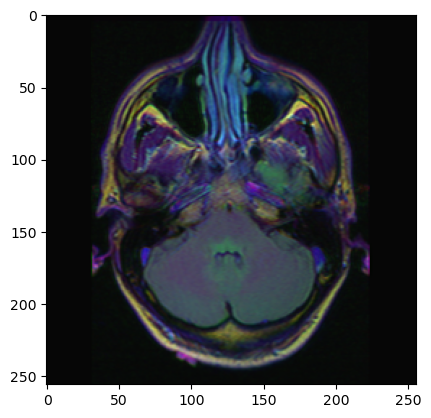

In [9]:
plt.imshow(highboost(im1, 0.1))


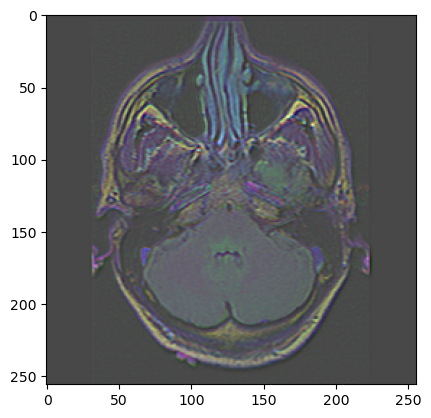

In [31]:
plt.imshow(highboost(im1, 2.51))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


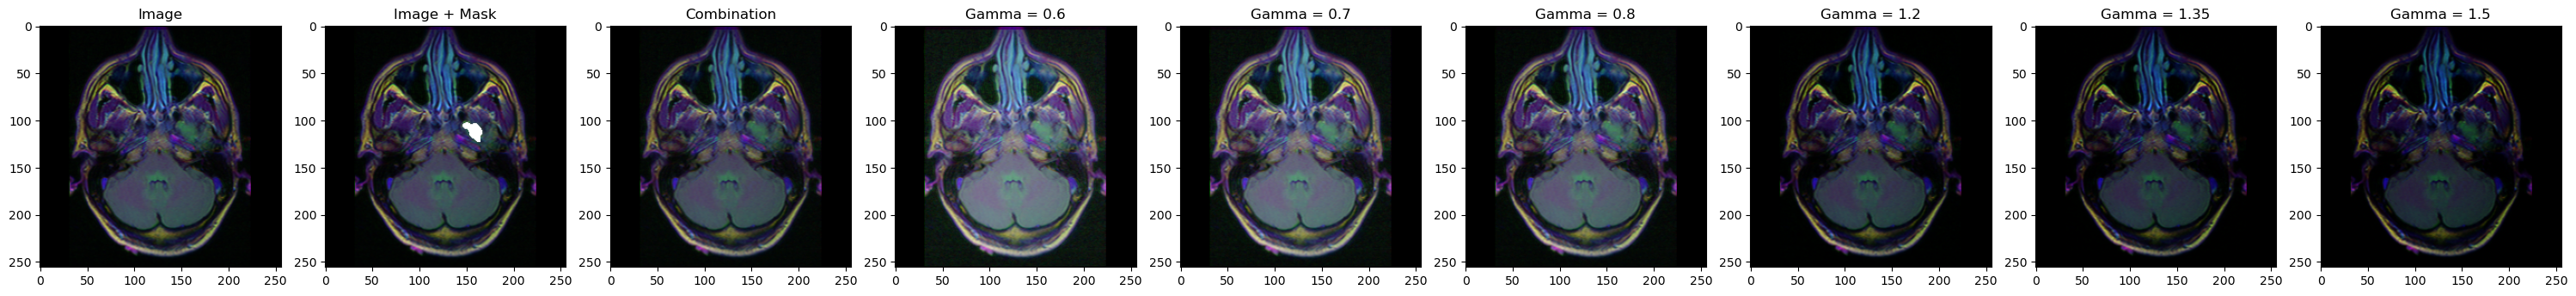

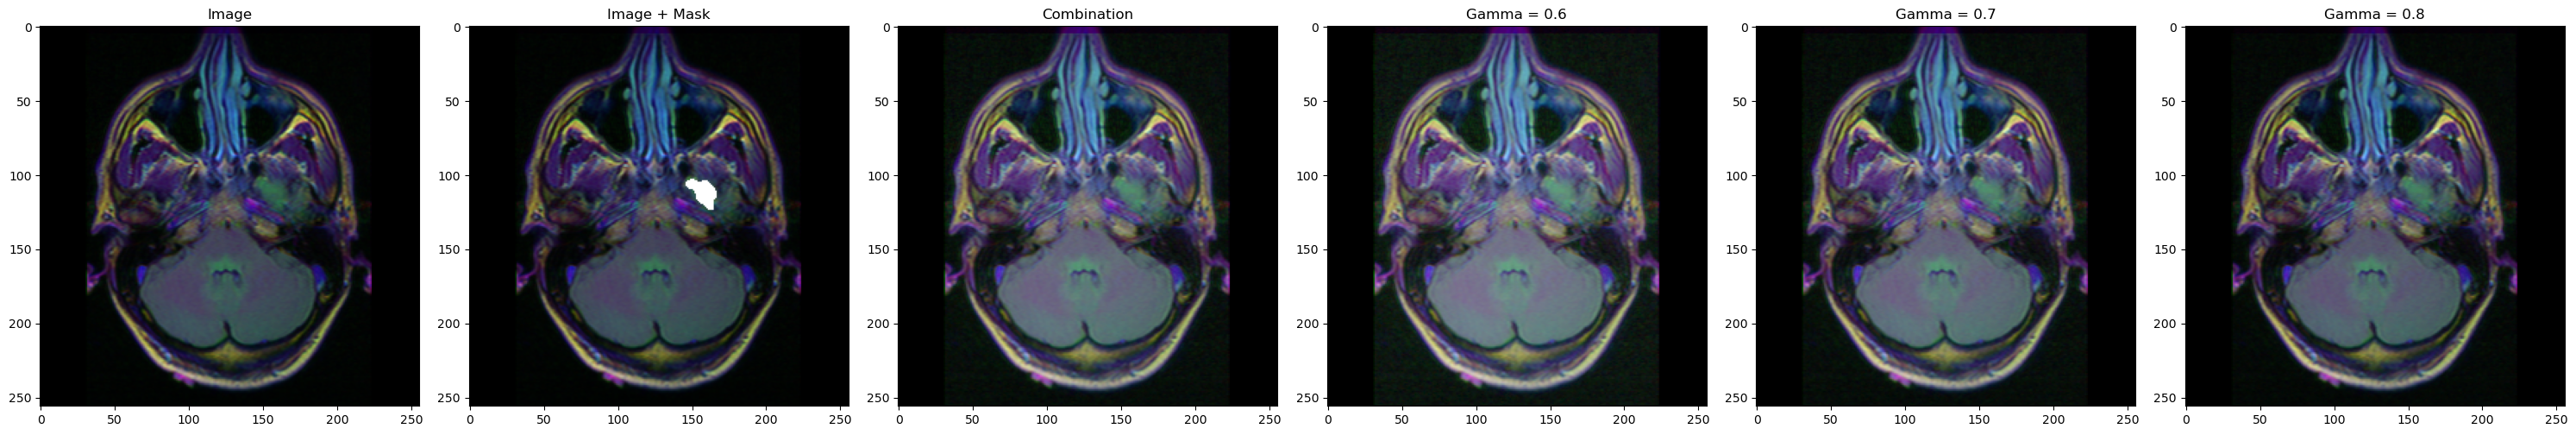

In [10]:
power_law_demonstration(im1, ms1, [0.6, 0.7, 0.8, 1.2, 1.35, 1.5])
power_law_demonstration(im1, ms1, [0.6, 0.7, 0.8])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


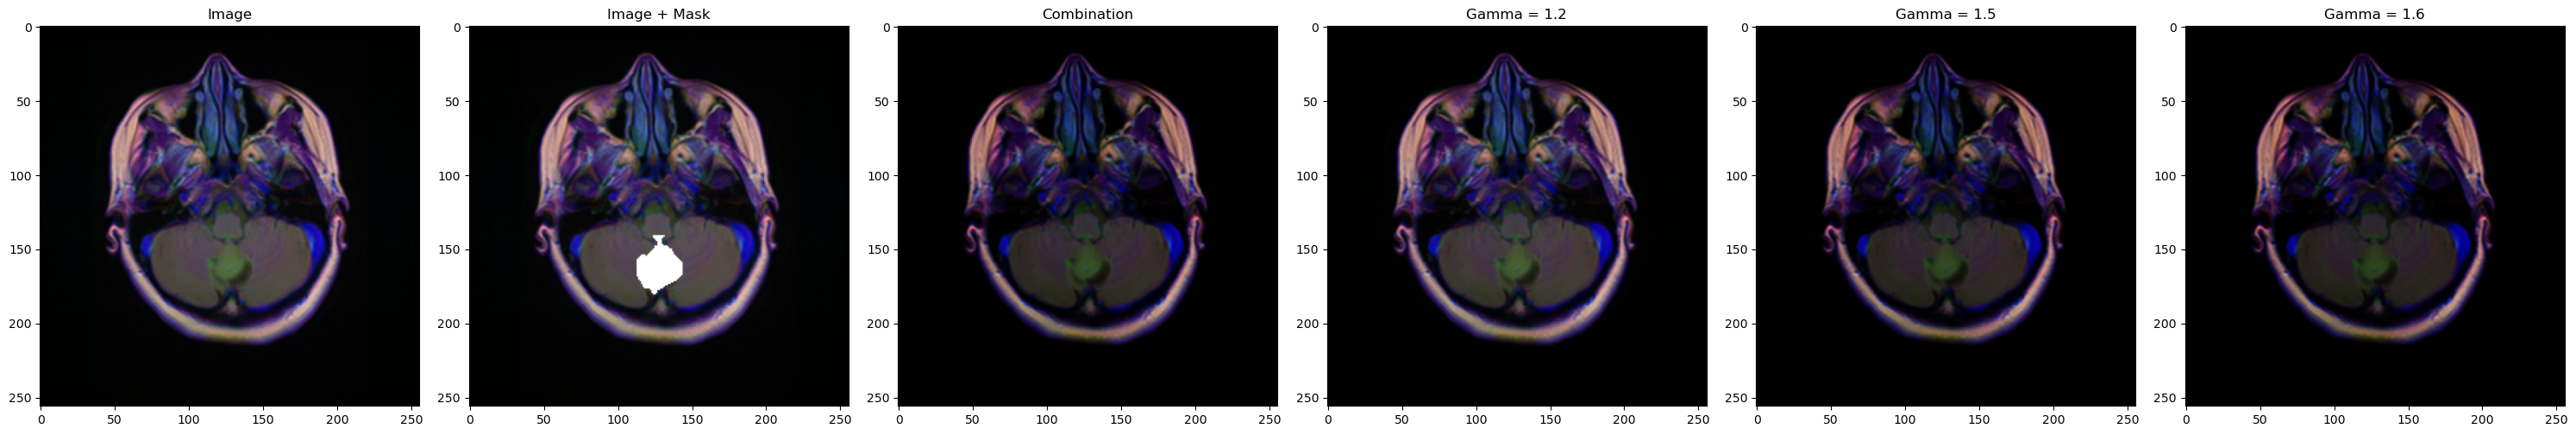

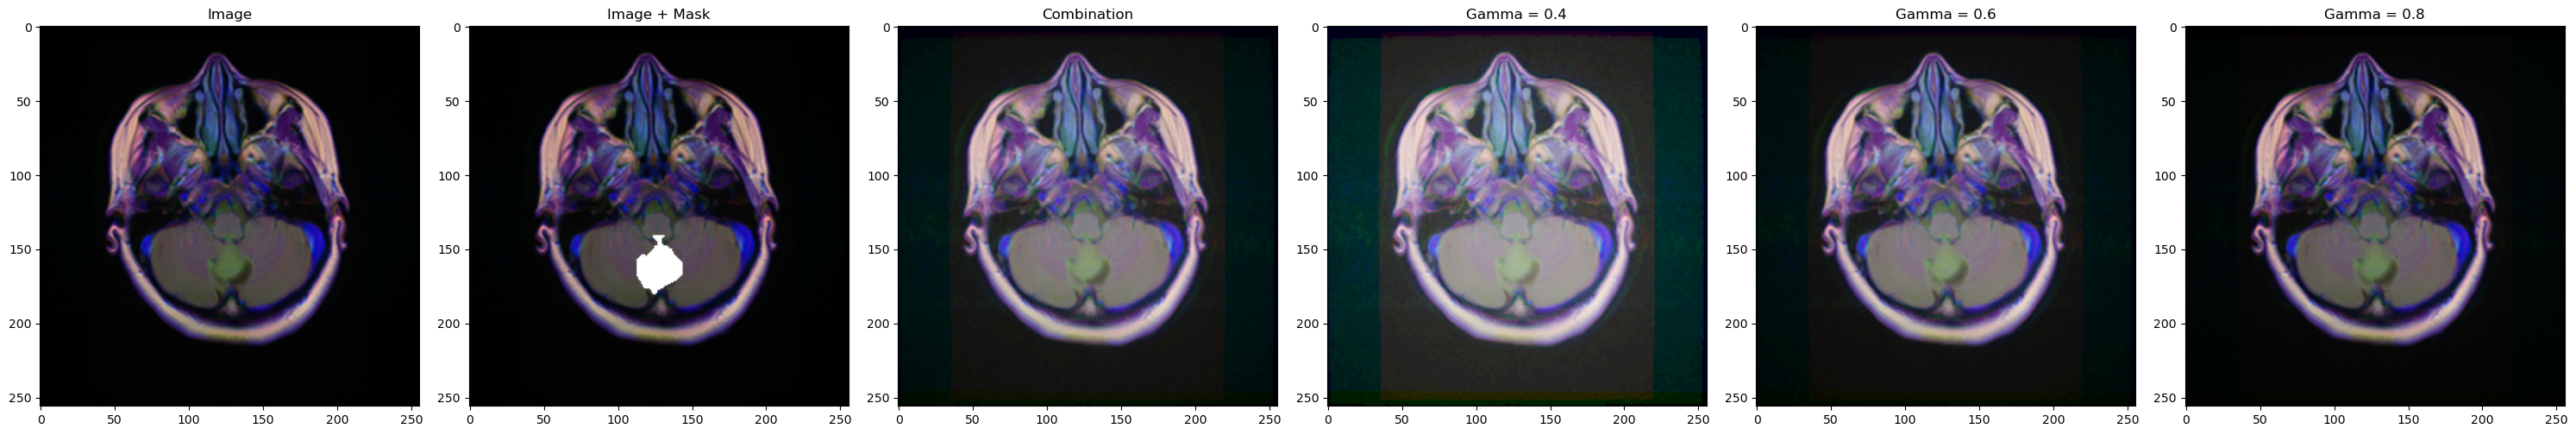

In [5]:
power_law_demonstration(im2, ms2, [1.2, 1.5, 1.6])
power_law_demonstration(im2, ms2, [0.4, 0.6, 0.8])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


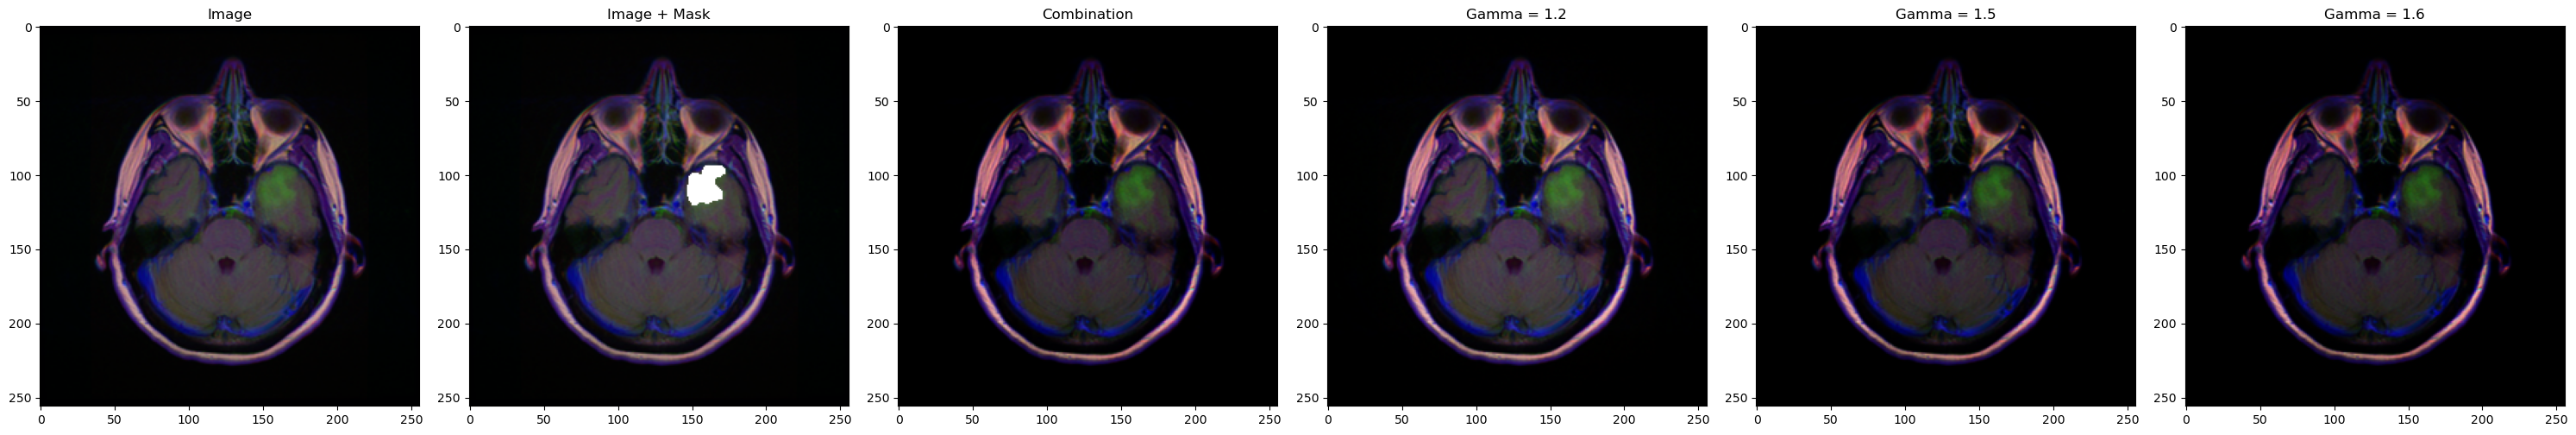

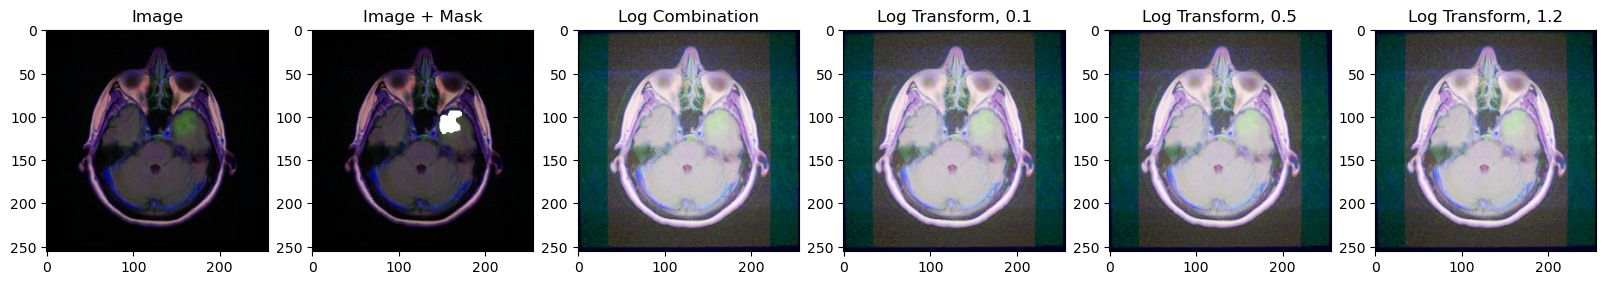

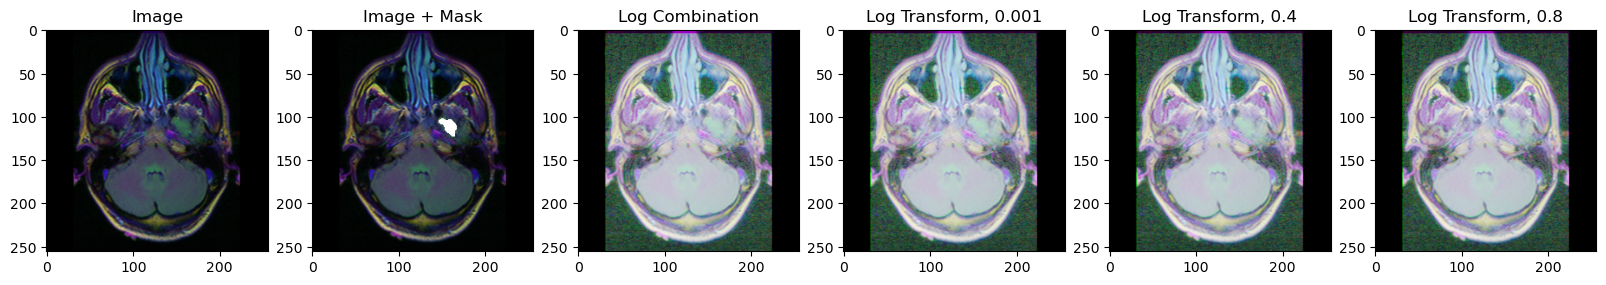

In [18]:
power_law_demonstration(im3, ms3, [1.2, 1.5, 1.6])
log_transform_demonstration(im3, ms3, [0.1, 0.5, 1.2])
log_transform_demonstration(im1, ms1, [0.001, 0.4, 0.8])

In [37]:
aug.loc[0, 'mask_path']

'./archive/kaggle_3m/TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_5_mask.tif'

In [45]:
info[info['img_path'].str.contains('TCGA_CS_4941_19960909_11')].values

array([['TCGA_DU_5849_19950405_23',
        './archive/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11.tif',
        './archive/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11_mask.tif',
        4278, 1]], dtype=object)

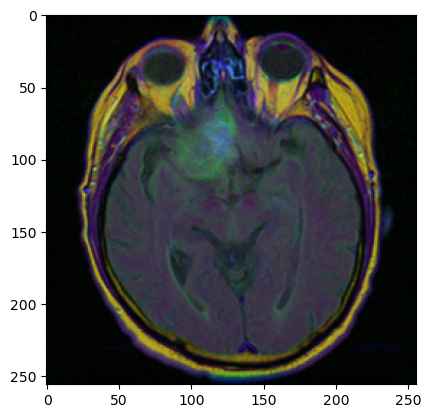

In [48]:
plt.imshow(load_image( './archive/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11.tif'))

In [40]:
def gen_aug_image(image_path):
    
    name = image_path.split('/')[-1][:-4]
    im = load_image(image_path)
    im = power_law_combination(im, [1.2, 1.5, 1.6])

    OUTPUT_PATH = './augmentation/mask_00/'
    
    cv2.imwrite(f'{OUTPUT_PATH}{name}_CPL01.tif', im)

_ = aug.apply(lambda x: gen_aug_image(x.img_path), axis=1)
    

In [ ]:
ni = 3
offset=10
fig,axs = plt.subplots(ni, 3, figsize=(20,15))
index=0

for cs,m,im in aug.loc[offset:offset+ni, ['channel_shift', 'mask_path', 'img_path']].values:
    image = cv2.imread(im)
    channel_shift = cv2.imread(cs)
    mask = cv2.imread(m)

    axs[index][0].imshow(image)
    axs[index][1].imshow(channel_shift)
    axs[index][2].imshow(mask)

    index += 1

fig.tight_layout()


In [ ]:
aug.reset_index(drop=True, inplace=True)

In [ ]:
aug.loc[:3,['channel_shift', 'mask_path', 'img_path']]

In [ ]:
aug

In [ ]:
aug['channel_shift'] = aug_list